# Introduction
In this assignment we look at Digital Fourier Trnasform.<br/>
## Z-Transform:
$F(z)=\sum\limits^{\infty}_{n=-\infty}f[n]z^{-n}$<br/>
Replacing $z$ with $e^{j\theta}$ i.e. confining ourselves to a unit circle.<br/>
$F(e^{j\theta})=\sum\limits^{\infty}_{n=-\infty}f[n]e^{-jn\theta}$<br/>
$F(e^{j\theta})$ is called the $\textbf{DTFT}$ or the $\textbf{Digital Spectra}$ of the samples $f[n]$.<br/>
<br/>
* Suppose $f[n]$ is periodic with period N then $f[n]=f[n+N] \forall{n}$<br/>
Then the $\textbf{DTFT}$ collapses to $\textbf{DFT}$ or $\textbf{Discrete Fourier Transform}$<br/>
So we have $F[k]=\sum\limits^{N-1}_{n=0}f[n]exp(-2\pi j\dfrac{nk}{N})=\sum\limits^{N-1}_{n=0}f[n]W^{nk}$<br/>
$\therefore f[n]=\dfrac{1}{N}\sum\limits^{N-1}_{k=0}F[k]W^{-nk}$<br/>

This means that $\textbf{DFT}$ is a sampled version of $\textbf{DTFT}$  which is the digital version of the analog version.<br/>


# Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fourier Transform of sin(x):
$y=sin(x)=\dfrac{e^{jx}-e^{-jx}}{2j}$<br/>
So the spectrum is:<br/>
$Y(\omega)=\dfrac{1}{2j}[\delta(\omega -1)+\delta(\omega +1)]$<br/>
So two dirac deltas are expected and phase at $-\dfrac{\pi}{2}$ and $\dfrac{\pi}{2}$.

The graphs are not as expected as there are some bugs in the code which are:<br/>
* Overlap of the end points in each cycle.So the last point has to be omitted.<br/>
* Division by 'N' to get the correct magnitude.<br/>

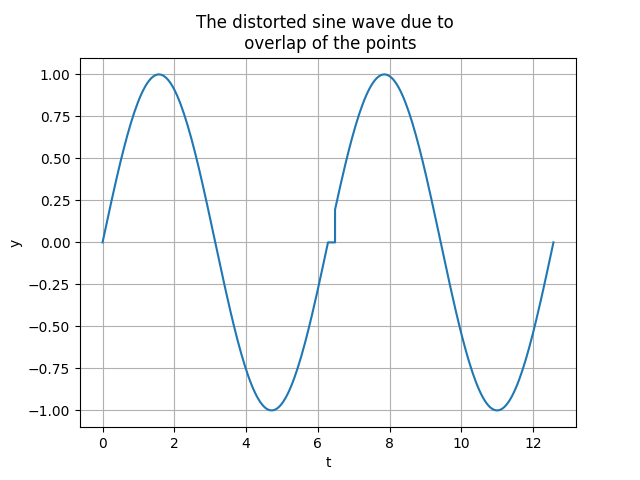

In [2]:
from IPython.display import Image
Image(filename='/Users/siddharthnayak/Desktop/Distort_sine.png')

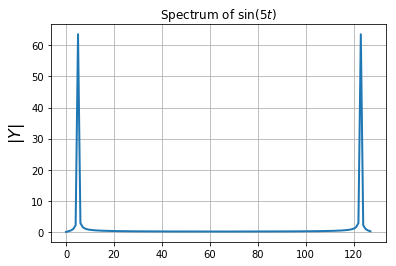

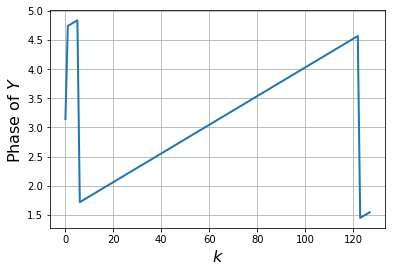

In [3]:
x=np.linspace(0,2*np.pi,128)
y=np.sin(5*x)
Y=np.fft.fft(y)
plt.plot(abs(Y),lw=2)
plt.ylabel(r"$|Y|$",size=16)
plt.title(r"Spectrum of $\sin(5t)$")
plt.grid(True)
plt.show()
plt.plot(np.unwrap(np.angle(Y)),lw=2)
plt.ylabel(r"Phase of $Y$",size=16)
plt.xlabel(r"$k$",size=16)
plt.grid(True)
plt.show()

# Function to plot the spectrums :
The arguments of the spectrums are:
* y = an array of values of function which is to be plotted.<br/>
* samples = number of samples to be taken for the frequencies.<br/>
* suppress = minimum value of the magnitude to be not considered as noise.<br/>
* w_lim = limits of the frequencies 
* title = name for the title of the plot

In [4]:
def plot_spectrum(y,samples,suppress,w_lim,title):
    Y=np.fft.fftshift(np.fft.fft(y))/samples
    w=np.linspace(-64,63,samples)
    
    #### plot magnitude #####
    plt.plot(w,abs(Y),lw=2,label='magnitude')
    plt.xlim([-w_lim,w_lim-1])
    plt.ylabel(r"$|Y|$",size=16)
    plt.title("Spectrum of" +title)
    plt.grid()
    plt.legend()
    plt.show()
    
    #### plot phase #####
    if suppress==None:
        plt.plot(w,np.angle(Y),'ro',lw=2,label='noise')
        ii=np.where(abs(Y)>1e-3)
        plt.plot(w[ii],np.angle(Y[ii]),'go',lw=2,label='expected_phase')
    else:
        ii=np.where(abs(Y)>suppress)
        plt.plot(w[ii],np.angle(Y[ii]),'go',lw=2,label='expected_phase')
    plt.xlim([-w_lim,w_lim+1])
    plt.ylabel(r"Phase of $Y$",size=16)
    plt.xlabel(r"$k$",size=16)
    plt.legend()
    plt.grid(True)
    plt.show()

Now we have two Deltas and phase at $-\dfrac{\pi}{2}$ and $\dfrac{\pi}{2}$.

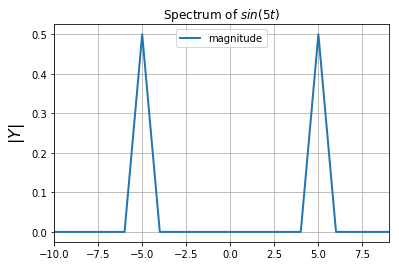

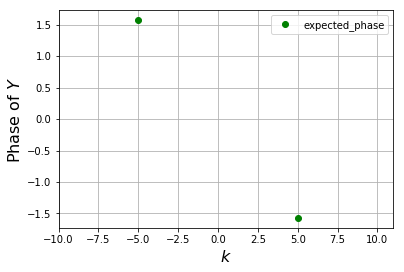

In [5]:
x=np.linspace(0,2*np.pi,129)
x=x[:-1] #to account for the overlapping in the sine function
y=np.sin(5*x)
plot_spectrum(y=y,samples=128,suppress=1e-3,w_lim=10,title=' $sin(5t)$')

# Amplitude Modulation:
$f(t)=(1+0.1cos(t))(cos(10t))$<br/>
$f(t)=cos(10t)+0.1cos(t)cos(10t)$<br/>
$f(t)=cos(10t)+0.05(cos(11t)+cos(9t))$<br/>
$f(t)=0.5(e^{j10x}+e^{-j10x})+0.025(e^{j11x}+e^{-j11x}+e^{j9x}+e^{-j9x})$

We expect 3 delta functions but in the first graph we don't get it.<br/>
In the first plot the time limits are not sufficient and thus we don't have sufficient number of points between each of the frequencies.Thus we increas the limits as well as the number of samples.

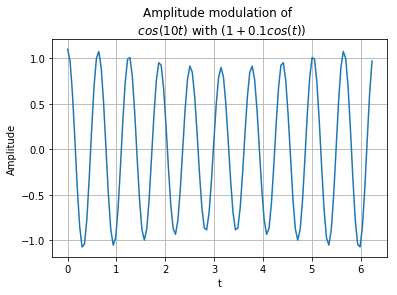

In [6]:
t=np.linspace(0,2*np.pi,129);t=t[:-1]
y=(1+0.1*np.cos(t))*np.cos(10*t)
plt.plot(t,y)
plt.grid()
plt.title('Amplitude modulation of \n $cos(10t)$ with $(1+0.1cos(t))$')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.show()

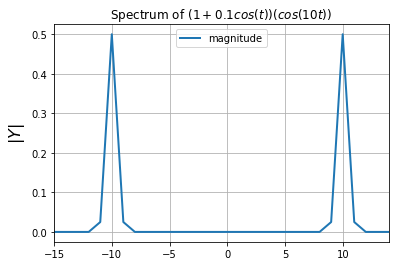

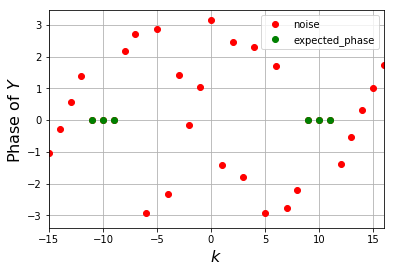

In [7]:
plot_spectrum(y=y,samples=128,suppress=None,w_lim=15,title=' $(1+0.1cos(t))(cos(10t))$')

# Stretching of 't' axis

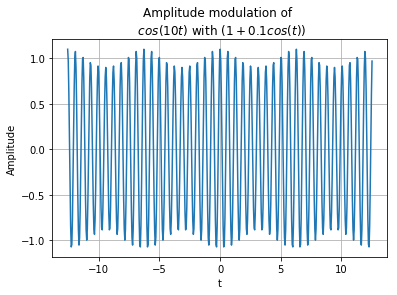

In [8]:
t=np.linspace(-4*np.pi,4*np.pi,513);t=t[:-1]
y=(1+0.1*np.cos(t))*np.cos(10*t)
plt.plot(t,y)
plt.grid()
plt.title('Amplitude modulation of \n $cos(10t)$ with $(1+0.1cos(t))$')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.show()

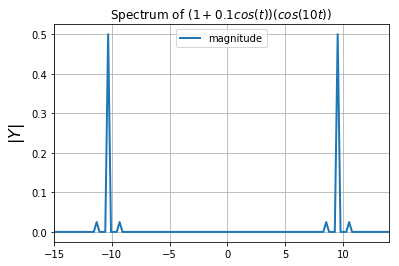

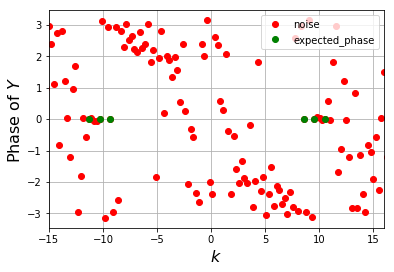

In [9]:
t=np.linspace(-4*np.pi,4*np.pi,513);t=t[:-1]
y=(1+0.1*np.cos(t))*np.cos(10*t)
plot_spectrum(y=y,samples=512,suppress=None,w_lim=15,title=' $(1+0.1cos(t))(cos(10t))$')

# Input: $sin^3(t)$ and $cos^3(t)$<br/>
$sin^3(t)=\dfrac{3sin(x)-sin(3x)}{4}=\frac{0.25}{2j}((3(e^{jx}-e^{-jx})-(e^{j3x}-e^{-j3x}))$<br/>
This has 2 deltas with magnitude 0.375 and 2 deltas with magnitude 0.125 and corresponding to their signs the phase will be $-\dfrac{\pi}{2}$ or $\dfrac{\pi}{2}$.<br/>
$cos^3(t)=\dfrac{3cos(x)+cos(3x)}{4}=\frac{0.25}{2}((3(e^{jx}+e^{-jx})+(e^{j3x}+e^{-j3x}))$<br/>
This has 2 deltas with magnitude 0.375 and 2 deltas with magnitude 0.125 and the phase will be zero.<br/>
Therefore we expect four deltas in each of the case.Both the graphs differ only in their phase plot.

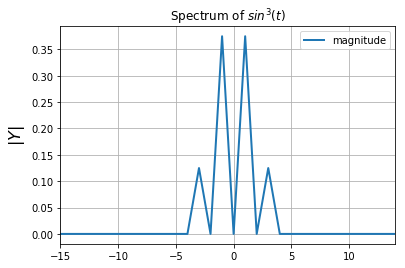

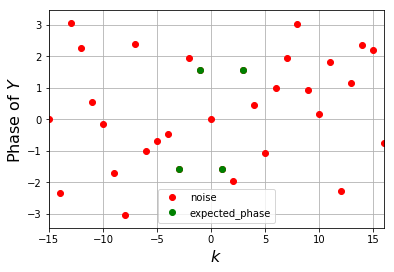

In [10]:
t=np.linspace(0,2*np.pi,129);t=t[:-1]
y=np.sin(t)**3
plot_spectrum(y=y,samples=128,suppress=None,w_lim=15,title=' $sin^3(t)$')


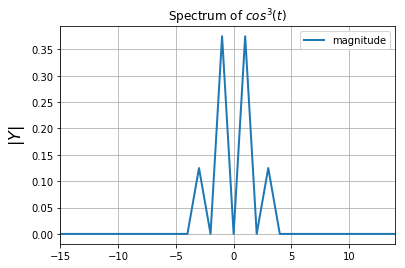

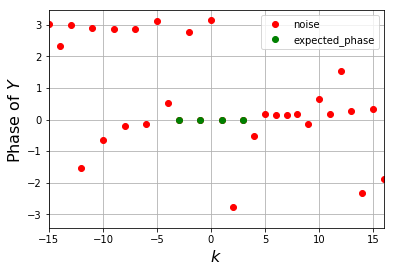

In [11]:
t=np.linspace(0,2*np.pi,129);t=t[:-1]
y=np.cos(t)**3
plot_spectrum(y=y,samples=128,suppress=None,w_lim=15,title=' $cos^3(t)$')

# Phase Modulation:
$cos(20t+5cos(t))$<br/>
A phase modulated signal is expressed as:<br/>
$f(t)=A_0cos(2\pi f_ct+\mu_pcos(2\pi f_m t))$<br/>
$\therefore$ it can be represented as:<br/>
$f(t)=\sum\limits_{n=-\infty}^{\infty}a_cJ_n(\mu)cos(2\pi(f_c+nf_m)t)$ where $J_n(x)$ is the Bessels function of the first kind.


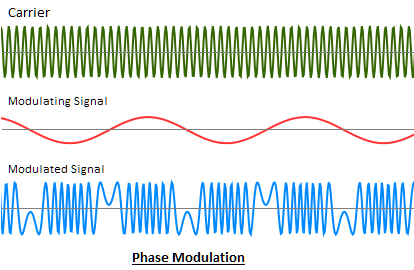

In [12]:
from IPython.display import Image
Image('/Users/siddharthnayak/Downloads/phase-modulation-waves.png')

As it can be seen in the above image,the modulated signal has variable frequency and is periodic.

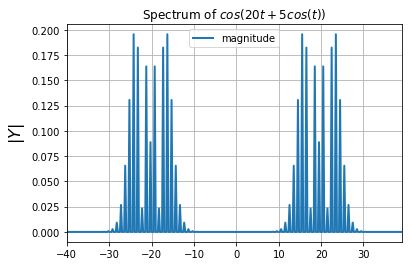

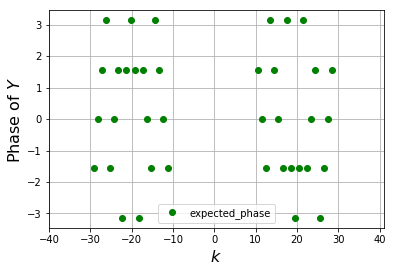

In [13]:
t=np.linspace(-4*np.pi,4*np.pi,513);t=t[:-1]
y=np.cos(20*t+5*np.cos(t))
plot_spectrum(y=y,samples=512,suppress=1e-3,w_lim=40,title=' $cos(20t+5cos(t))$')

# Gaussian Function:
As a gaussian function is not bandlimited we have to choose a large range of frequencies to get a good estmiate of the fourier transform.<br/>
$F(\omega)=\dfrac{1}{2\pi}\int_{-\infty}^{\infty}f(t)e^{-j\omega t}dt$<br/>
$F(\omega)=\dfrac{1}{2\pi}\int_{-\infty}^{\infty}e^{-\frac{t^2}{2}}e^{-j\omega t}dt$<br/>
$F(\omega)=\dfrac{1}{2\pi}\int_{-\infty}^{\infty}e^{-(\frac{t}{\sqrt{2}}+\frac{j\omega}{\sqrt{2}})^2}e^{-\frac{\omega^2}{2}}dt$<br/>
Now substituting $(\frac{t}{\sqrt{2}}+\frac{j\omega}{\sqrt{2}})$ with x, we have:<br/>
$dt=\sqrt{2}dx$<br/>
$\therefore F(\omega)=\sqrt{2} e^{-\frac{\omega^2}{2}}\dfrac{1}{2\pi}\int_{-\infty}^{\infty}e^{-x^2}dx$<br/>
We know that $\int_{-\infty}^{\infty}e^{-x^2}dx=\sqrt{\pi}$<br/>
$\therefore F(\omega)=\frac{1}{\sqrt{2\pi}}e^{-\frac{\omega^2}{2}}$<br/>
As this is not a bandlimited signal,so when we take DFT,we have to scale the magnitude with $\dfrac{2\pi}{T}$ ,where $\dfrac{1}{T}$ is the sampling frequency.

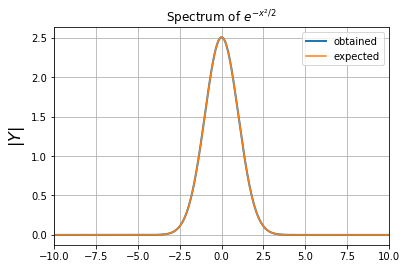

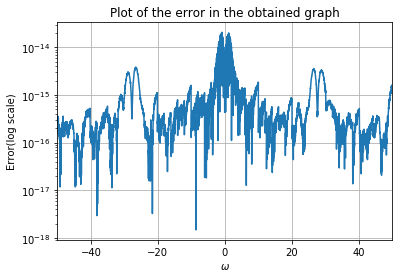

In [14]:
import numpy as np
import matplotlib.pyplot as plt
n=w_limit=40
samples=10000
t=np.linspace(-n*np.pi,n*np.pi,samples+1);t=t[:-1]
y=np.exp(-t*t/2)
Y=np.fft.fftshift(np.abs(np.fft.fft(y)))*(2*(n*np.pi))/samples
# magnitude scaling by (2pi/T)
w=np.linspace(-samples/(2*n),samples/(2*n),samples+1);w=w[:-1]
y_exp=np.exp(-w*w/2)*np.sqrt(2*np.pi)
title=' $e^{-x^2/2}$'

#### plot magnitude of obtained graph#####
plt.plot(w,abs(Y),lw=2,label='obtained')
plt.xlim([-10,10])
plt.ylabel(r"$|Y|$",size=16)
plt.title("Spectrum of" +title)


#### plot magnitude of expected graph#####
plt.plot(w,y_exp,label='expected')
plt.xlim([-10,10])
plt.legend()
plt.grid()
plt.show()

plt.semilogy(t,np.abs(abs(Y)-y_exp))
plt.grid()
plt.xlim([-50,50])
plt.title('Plot of the error in the obtained graph')
plt.xlabel('$\omega$')
plt.ylabel('Error(log scale)')
plt.show()

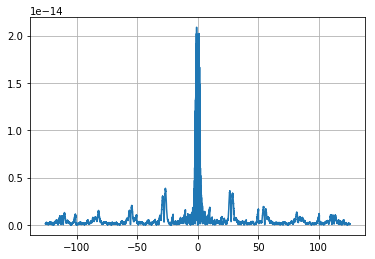

Max error is 2.0872192863e-14


In [15]:
plt.plot(t,np.abs(abs(Y)-y_exp))
plt.grid()
plt.show()
print('Max error is %s'%str(max(np.abs(abs(Y)-y_exp))))

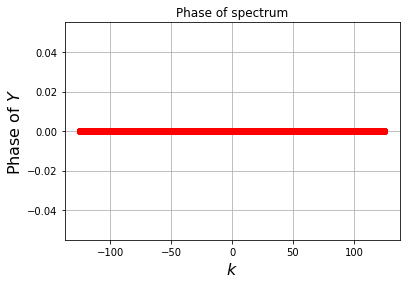

In [16]:
plt.plot(w,np.angle(Y),'ro',lw=2)
plt.ylabel(r"Phase of $Y$",size=16)
plt.title('Phase of spectrum')
plt.xlabel(r"$k$",size=16)
plt.legend()
plt.grid(True)
plt.show()

# Bonus:
Fourier Transform of 2-dimensional signals:<br/>
Images are excellent examples of 2-D signals where the intensity of the pixel values change over space in both dimensions(x,y).<br/>
Thus the analogy is (x and y) $\longrightarrow t$ and Intensity of pixel $\longrightarrow$ Amplitude of signal.<br/>
## The procedure for 2D Fourier Transform:
* The image is read in using `cv2`(OpenCV) library which is a useful library in image processing.<br/>
* Then it is converted to grayscale.We could have taken a fourier transform with the original image but then we would have had to take it three times (each for one channel of the colour R-red,G-green,B-blue).<br/>
* Then we take fft in 2D using `np.fft.fft2` and then shift it using `np.fft.fftshift`.And then we plot it on a dB scale.<br/>
* Generally in an arbitrary image we get a bright spot at the centre(frequency is zero) and it slowly fades down as we go further away from the centre.<br/>
* This is because in a general image the number of pixels with frequency zero than the high components.

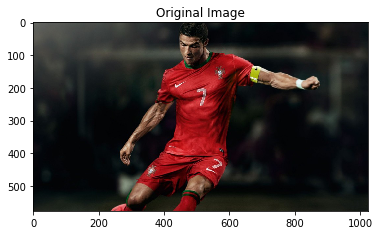

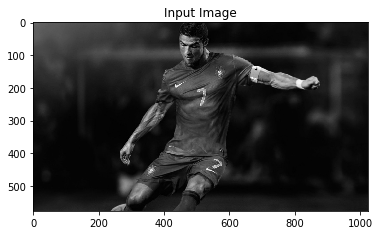

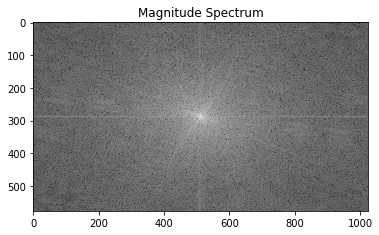

In [17]:
import cv2
img = plt.imread('/Users/siddharthnayak/Downloads/Cristiano-Ronaldo-HD-Portugal-wallpaper-1024x576.jpg',0)
plt.imshow(img)
plt.title('Original Image')
plt.show()

img = cv2.imread('/Users/siddharthnayak/Downloads/Cristiano-Ronaldo-HD-Portugal-wallpaper-1024x576.jpg',0)
# now image is a grayscale version
f = np.fft.fft2(img) #take 2D fft
fshift = np.fft.fftshift(f) # shift 
magnitude_spectrum = 20*np.log(np.abs(fshift))
#get the magnitude on dB scale

plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.show()

plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()


# Conclusions
Thus Fourier transforms of signals as well as images can be taken using python without using any special libraries.<br/>
An FFT algorithm computes the discrete Fourier transform (DFT) of a sequence, or its inverse (IFFT). Fourier analysis converts a signal from its original domain to a representation in the frequency domain and vice versa. An FFT rapidly computes such transformations by factorizing the DFT matrix into a product of sparse (mostly zero) factors.As a result, it manages to reduce the complexity of computing the DFT from 
O($n^2$) to O(nlog(n)) where,n is the data size.<br/>
Thus FFT allows us to take fourier transforms quickly.